<a href="https://colab.research.google.com/github/ralphSmith300000/training/blob/main/Only_Peice_Custom_Env_RL_Gray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Install Dependencies

In [ ]:
!pip3 install virtualenv

In [ ]:
!virtualenv theanoEnv

In [ ]:
!source /content/theanoEnv/bin/activate;

In [ ]:
#@title Default title text
!pip install tensorflow-gpu
!pip install gym
!pip install keras
!pip install keras-rl2

     |████████████████████████████████| 511.7 MB 4.4 kB/s 
     |████████████████████████████████| 1.6 MB 50.5 MB/s 
     |████████████████████████████████| 438 kB 60.2 MB/s 
     |████████████████████████████████| 5.8 MB 38.3 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5.3
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 2.0
    Uninst

     |████████████████████████████████| 52 kB 845 kB/s 
     |████████████████████████████████| 462 kB 7.5 MB/s 
     |████████████████████████████████| 5.8 MB 61.5 MB/s 
     |████████████████████████████████| 1.4 MB 49.8 MB/s 
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.0
    Uninstalling tensorboard-2.9.0:
      Successfully uninstalled tensorboard-2.9.0
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-gpu 2.9.0 requires keras<2.10.0,>=2.9.0rc0, but you have keras 2.8.0 which is incompatible.
tensorflow-gpu 2.9.0 requires tensorboard<2.10,>=2.9, but you have tensorboard 2.8.0 which is incompatible.


In [ ]:
!pip uninstall opencv-python
!pip install opencv-python

In [ ]:
!zip -r /content/venv.zip /content/theanoEnv

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
import tensorflow.keras.initializers as initializers
from tensorflow.keras.optimizers import Adam

In [ ]:
!nvidia-smi

Fri Nov 18 10:14:37 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# 1. Test Random Environment with OpenAI Gym

In [22]:
import gym
from gym import Env
from gym.spaces import Discrete, Box
import numpy as np
import random

import math
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import PIL.Image as Image

from gym import Env, spaces
import time

In [ ]:
print(cv2.__version__)

4.7.0


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [23]:
class Point(object):
    #def __init__(self, name, x_max, x_min, y_max, y_min):
    def __init__(self,x,y, x_max, x_min, y_max, y_min):
        self.x = x
        self.y = y
        self.x_min = x_min
        self.x_max = x_max
        self.y_min = y_min
        self.y_max = y_max
        self.position = 0
        self.set_position(x,y)
        #self.name = name

    def set_position(self,x,y):
        self.x = self.clamp(x, self.x_min, self.x_max)
        self.y = self.clamp(y, self.y_min, self.y_max)
        self.position = (self.x,self.y)

    def get_position(self):
        #print(f"Current agent posisiotn:{self.position}")
        return self.position

    def clamp(self, n, minn, maxn):#to keep agent inside the grid
        return max(min(maxn, n), minn)

class Drone(Point):
    def __init__(self,x,y, x_max, x_min, y_max, y_min):
        super().__init__(x,y,x_max, x_min, y_max, y_min)
        self.positionDrone = self.get_position()
        self.action_space = spaces.Discrete(5,)

    def action(self, choice,ratio):
        #Gives us 5 total movement options. 0:(0,1), 1:(1,1), 2:(1,0), 3:(-1,1), 4:(-1,0), 5:(-1,-1), 6:(0,-1), 7:(1,-1)

        if choice == 0:
            self.move(0*ratio, 1*ratio)
        elif choice == 1:
            self.move(1*ratio , 1*ratio)
        elif choice == 2:
            self.move(1*ratio , 0*ratio)
        elif choice == 3:
            self.move(-1*ratio , 1*ratio)
        elif choice == 4:
            self.move(-1*ratio , 0*ratio)

        '''
        elif choice == 5:
            self.move(-1*ratio , -1*ratio)
        elif choice == 6:
            self.move(0*ratio , -1*ratio)
        elif choice == 7:
            self.move(1*ratio , -1*ratio)
        '''
        return self.position

    def actionf(self, choice):
        #Gives us 5 total movement options. 0:(0,1), 1:(1,1), 2:(1,0), 3:(-1,1), 4:(-1,0), 5:(-1,-1), 6:(0,-1), 7:(1,-1)

        if choice == 0:
            self.move(0, 1)
        elif choice == 1:
            self.move(1, 1)
        elif choice == 2:
            self.move(1 , 0)
        elif choice == 3:
            self.move(-1 , 1)
        elif choice == 4:
            self.move(-1, 0)
        return self.position

    def move(self, del_x, del_y):
        self.x += del_x
        self.y += del_y

        self.x = self.clamp(self.x, self.x_min, self.x_max )
        self.y = self.clamp(self.y, self.y_min, self.y_max )
        self.position = (self.x,self.y)

In [24]:
from gym.envs import registration

class HandleImage:
  def __init__(self,image):
    self.image = image
    #All operations will be performed when we create a new instance of this class:
    self.changedImage = self.ConvertImageToGrayScale()
    #self.changedImage = self.ConvertImageToBW()
    self.h = 0
    self.w = 0

    self.numOfPeices = 10
    (self.h,self.w) = self.GetImageSize(self.changedImage)
    self.resizeFactor = self.w/self.h
    #self.Obstacles = []
    #self.Obstacles = [(math.floor(85/self.resizeFactor),math.floor(60/self.resizeFactor))]


    #print(f"image size: w ={self.w} and h ={self.h}")
    self.imagePixels = []
    self.MapAllImagePixels(self.changedImage)

  def ConvertImageToGrayScale(self):
    return 	cv2.cvtColor(self.image, cv2.COLOR_BGR2GRAY)

  def ConvertImageToBW(self):
    grayImage = cv2.cvtColor(self.image, cv2.COLOR_BGR2GRAY)
    (thresh, blackAndWhiteImage) = cv2.threshold(grayImage, 125, 255, cv2.THRESH_BINARY)
    return blackAndWhiteImage

  def valuesofimage(self):
    for i in range (255):
      print(f"{self.changedImage[i]}")

  def GetImageSize(self,grayImage):
    return grayImage.shape[:2]

  def DisplayImage(self,image):
    cv2_imshow(image)
    #cv2.imshow('Image', image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
  '''
  def GetPixelValueFromPoint(self,(x,y)):
    #k = img[i,j] print(k)
    #To get all values: #rows,cols = img.shape  #for i in range(rows): #for j in range(cols):
    return img[x,y]
  '''

  def MapAllImagePixels(self,grayImage):
    (imageWidth,imageHeight) = (self.w, self.h)
    for i in range (self.h):
      for j in range (self.w):
          self.imagePixels.append([(i,j),imageHeight - imageWidth*i +j,grayImage[i,j],0])#this list will be: ((x,y),MapedCoordinate,Level,count)=>(point,mappedPoint,PixelLevel,visitedStateCnt)
    #print(len(self.imagePixels))

  def MapPeiceOfPixels(self,initPos,newPos):
    (imageWidth,imageHeight) = (newPos[0]-initPos[0], newPos[1]-initPos[1])
    for i in range (initPos[0],newPos[0]):
      for j in range (initPos[1],newPos[1]):
          self.imagePixels.append([(i,j),imageHeight - imageWidth*i +j,self.changedImage[i,j],0])#this list will be: ((x,y),MapedCoordinate,Level,count)=>(point,mappedPoint,PixelLevel,visitedStateCnt)
    #pass

  def LoadPeiceOfArray(self,position):
    #check if the position x and y are within the dimensions
    #must pass numOFPeices by argument
    self.imagePixels.clear()
    x = position[0]+self.w/self.numOfPeices
    y = position[1]+(self.w/self.numOfPeices)/self.resizeFactor
    if x > self.w:
      x = self.w
    if y > self.h:
      y = self.h
    new_pos = (x , y)

    self.MapPeiceOfPixels(position,new_pos)
    return new_pos


  def MapState(self,position):
    return (self.h - self.w*position[0] + position[1])

  def GetAllImageState(self):
    AllImageState = []
    #print(f"we have height:{imageHeight} and width:{imageWidth}")
    for State in self.imagePixels:
      AllImageState.append(State[1])
    #print(type(np.array[AllImageState]))
    return np.array([AllImageState])


  def GetMappedState(self,position):
    for i in range (len(self.imagePixels)): #check if we have to use foreach
      if self.imagePixels[i][0] == position:
        return self.imagePixels[i][1]
    return -1

  def GetRewardForBlackAndWhite(self,PixelValue):
    reward = PixelValue if  PixelValue > 200 and  PixelValue <255 else -10
    return reward


In [25]:
from IPython.core.display import Math
class ShowerEnv(Env):
    def __init__(self,image):
        self.image = HandleImage(image) #this will create a new image class, it contains the size, and then we call the create pixels array from this one.
        #create the agent
        self.drone = Drone(0,0,(self.image.w-1),1,(self.image.h-1),1)# this will take the size from the image, in the code later we create the new image
        self.action_space = self.drone.action_space#Discrete(3)
        # Navigation array, so we track the movement for each episode.
        self.navigation = []
        # we will be cropping the image, and getting a peice of the image, and so we handle every peice alone.
        # every peice will have its own coordinate, so no need to load all the pixels, or even the apropriate peice pixels.
        '''
        if self.image.imagePixels:
          self.observation_space =  self.image.GetAllImageState()
        else :
          self.image.MapAllImagePixels(image.grayImage)
          self.observation_space =  self.image.GetAllImageState()
        '''
        #place drone at random location when start at the top of the map
        #self.drone.set_position(math.floor(random.randint(0,self.image.w)/self.image.resizeFactor), 1)
        self.defaultposition = self.drone.get_position()
        #print(self.defaultposition)
        #                        math.floor(random.randint(0,self.image.h)/self.image.resizeFactor)) #change the position according to the pos from image
        #self.state = self.reset()
        # Set episode length, will be set after we declare a new image and get the pixels array, this will be in the main
        self.episode_length = len(self.image.imagePixels)
        print(f"episode length:{self.episode_length}")
        self.continuousPath = 0

    def step(self, action):
        # Apply action
        new_state = 0
        reward = 0
        done = False

        new_position = self.drone.actionf(action)
        #print(f"in step fct: action:{action},new_position:{new_position}")

        for i in range(len(self.image.imagePixels)):

              if self.image.imagePixels[i][0] == new_position:
                      new_state = self.image.imagePixels[i][1]
                      reward = self.image.GetRewardForBlackAndWhite(self.image.imagePixels[i][2])
                      self.image.imagePixels[i][3] = self.image.imagePixels[i][3] +1

                      self.episode_length = self.episode_length -1

                      if (self.episode_length <= 0):
                        print("full episode")
                        reward = -10
                        done = True
                        break
                      if new_position == (self.image.w-1,self.image.h-1):
                        print("goal reached with position")
                        #pass
                        done = True
                        reward += self.continuousPath+10

                      if new_state == self.image.MapState((self.image.w-1,self.image.h-1)):
                        print("goal reached with state")
                        #pass
                        done = True
                        reward += self.continuousPath+10
                      if reward <0:
                        self.continuousPath =0
                      if new_position[0]== 0 or new_position[0] == self.image.w-1 or \
                           new_position[1]== 0 or new_position[1]== self.image.h-1:
                           print("limit reached")
                           done = True
                           break


                      if self.image.imagePixels[i][3] > 2:
                        #print(f" pos:{new_position},visitied : {self.image.imagePixels[i][3]}")
                        self.image.imagePixels[i][3] = 0
                        self.step(1)
                      self.continuousPath +=1
                      break

        self.navigation.append(new_position)

        # Set placeholder for info
        info = {}

        # Return step information
        return new_state, reward, done, info

    def render(self):
        # Implement viz
        pass

    def reset(self):
        self.episode_length = len(self.image.imagePixels)
        self.navigation.clear()
        self.drone.set_position(self.defaultposition[0],self.defaultposition[1]) #need to get initiale position for every new image
        done = False
        for i in range(len(self.image.imagePixels)): #reset count for all pixels
          self.image.imagePixels[i][3] = 0
        #return self.image.imagePixels
        #print(f"new episode: length:{self.episode_length}, drone pos={self.drone.get_position()},mapped pose={self.image.GetMappedState(self.drone.get_position())}")
        return self.image.GetMappedState(self.drone.get_position())




In [26]:
def PlottingMap(env, pathName):
  plt.xlim(0, env.image.w-1)
  plt.ylim(0, env.image.h-1)

  x = env.image.w
  y = env.image.h
  im = cv2.rotate( env.image.image,cv2.ROTATE_90_COUNTERCLOCKWISE)
  for item in range (len(env.navigation)):
        x = env.navigation[item][0]
        y = env.navigation[item][1]
        plt.plot(x, y,scalex=True,scaley=True, marker="x", markersize=5, markeredgecolor="blue", markerfacecolor="green")

  plt.grid(True)
  plt.savefig(f'/content/sample_data/result/plot{pathName}.png')
  plt.imshow(env.image.image,origin='lower')#,vmin = 0, vmax = 255)
  plt.title('matplotlib.pyplot.grid() function Example\n\n', fontweight ="bold")
  plt.show()

In [27]:
#don't run, it is already sliced and saved on drive
import os
from PIL import ImageFile, Image
ImageFile.LOAD_TRUNCATED_IMAGES = True

def crop(infile,height,width,numPic):
    im = Image.open(infile)
    imgwidth, imgheight = im.size
    for i in range (numPic):
      box = (i*width, i*height,(i+1)*width, (i+1)*height)
      print(f"the box:{box}")
      yield im.crop(box)

def MatrixOfPeices(infile,height,width,numpeices,rows,cols):
    map_peices = []
    #rows, cols = (5, 5)
    #arr = [[0]*cols for _ in range(rows)] # we have to type it this way to be able to update every element or else each time all elements are updated the same
    #infile='/content/sample_data/mapp1.png'
    start_num=0
    #Slice image to peices by h*w
    for k,piece in enumerate(crop(infile,height,width,numpeices),start_num):
      #print(k)
      img=Image.new('RGB', (width,height), 255)
      img.paste(piece)
      path=os.path.join('/content/sample_data/image/',"IMG-%s.png" % k)
      img.save(path) #save images path
      map_peices.append(path)
      #arr.append(path)
    #print(len(map_peices))
    return map_peices
    '''
    index = 0
    #assign peices to matrix position
    for row in range(0,len(arr)):
      for item in range(len(arr[row])):
        #print(f"row:{row},col:{item} ")
        arr[row][item] = map_peices[index]
        index +=1
        #print(f"row:{row},col:{item} is {arr[row][item]}" )
    return arr
    '''

In [ ]:
!python -m pip install image_slicer

In [ ]:
import image_slicer
image_slicer.slice('/content/gdrive/MyDrive/map.png', 14)

In [15]:
import cv2
import numpy as np

grayImage = '/content/gdrive/MyDrive/map_04_04.png'
image = cv2.imread(grayImage)
(h,w) =image.shape[:2]
print(np.average(image))

67.74529668423878


# Weigths for pictures and json

In [3]:
import glob
#add all peices to an array
tiles = glob.glob('/content/gdrive/MyDrive/map_*')
#tiles

In [ ]:
means = []
for t in tiles:
  #print(f"{t}") #t is the name of the file
  image = cv2.imread(t)
  (h,w) =image.shape[:2]
  means.append(np.average(image))
  #filename = t
means

In [20]:
M_peices = []
for  i, j in enumerate (means):
  if j >50 : M_peices.append(tiles[i])

M_peices

['/content/gdrive/MyDrive/map_01_02.png',
 '/content/gdrive/MyDrive/map_01_03.png',
 '/content/gdrive/MyDrive/map_01_04.png',
 '/content/gdrive/MyDrive/map_02_01.png',
 '/content/gdrive/MyDrive/map_02_02.png',
 '/content/gdrive/MyDrive/map_02_03.png',
 '/content/gdrive/MyDrive/map_03_01.png',
 '/content/gdrive/MyDrive/map_03_02.png',
 '/content/gdrive/MyDrive/map_03_03.png',
 '/content/gdrive/MyDrive/map_04_01.png',
 '/content/gdrive/MyDrive/map_04_02.png',
 '/content/gdrive/MyDrive/map_04_03.png',
 '/content/gdrive/MyDrive/map_04_04.png']

# **Q-Learning**

In [ ]:
#later make it as a section "Q Learning"
reward = 0
exploraion = 0
exploitation = 0
score = 0


qtable = np.zeros((len(env.image.imagePixels), env.drone.action_space.n))

# define hyperparameters ----------
total_episodes = 500     # Total episodes
learning_rate = 0.1# 0.01#0.00025#0.99#0.9           # Learning rate
max_steps = 0#len(self.env.Image.imagePixels)              # Max steps per episode
gamma = 0.95#0.75#0.99#0.85#0.75#0.99                  # Discounting rate

# Exploration parameters
epsilon = 1.0                 # Exploration rate
max_epsilon = 1.0             # Exploration probability at start
min_epsilon = 0.01            # Minimum exploration probability
decay_rate = 0.00005#0.998#0.05#0.01#0.05#0.005             # Exponential decay rate for exploration prob
# List of rewards


for episode in range(1, total_episodes):
    state = env.reset()
    done = False
    reward = 0
    action = 0
    score = 0
    random.seed(3)
    while not done:
        exp_exp_tradeoff = random.uniform(0, 1) #random.uniform will return a float
        ## If this number > greater than epsilon --> exploitation (taking the biggest Q value for this state)
        if exp_exp_tradeoff > epsilon:
            action = np.argmax(qtable[state,:])
            exploitation += 1
        # Else doing a random choice --> exploration
        else:
            action = env.drone.action_space.sample()
            exploraion += 1
        #print(f"action={action}, on state = {state}")
        #print(action)
        n_state, reward, done, info = env.step(action)
        #print(f"result:{n_state}, {reward}, {done}")
        #else:
        #print(f"new state:{n_state},with reward:{reward},done={done}")
        score+=reward
        qtable[state, action] = qtable[state, action] + learning_rate * (reward + gamma * np.max(qtable[n_state, :]) - qtable[state, action])
        state = n_state
        #if score < -500:
        #  done = True

        #print(f"q={qtable}")
    #print('Episode:{} Score:{}'.format(episode, score))

    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-(decay_rate)*episode)

#print(f"q={qtable}")
print(f"explor={exploraion},exploit={exploitation}")
print(f"{len(env.navigation)}")
#print(f"{env.previousstates}")
#print(f"{env.navigation}")

IndexError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys
np.set_printoptions(threshold=sys.maxsize)
#with np.printoptions(threshold=np.inf):
    #print(qtable)
with open('/content/drive/My Drive/foo2.txt', 'w') as f:
  with np.printoptions(threshold=np.inf):
    '''
    for item in range (len(env.navigation)):
          x = env.navigation[item][0]
          y = env.navigation[item][1]
          f.write(f"pos:({x},{y}),pixelvalue:{ env.image.changedImage[x][y]}\n")
    '''
    for i in range (len(env.image.imagePixels)):
      f.write(f"pos:{env.image.imagePixels[i][0]},has values:{env.image.imagePixels[i][2]}\n")
      '''
      for j in range (len(qtable[i])):
          #f.write(str(qtable))
          f.write(f"        values[{j}]:{qtable[i][j]}\n")

      f.write(f"            max = {np.argmax(qtable[env.image.imagePixels[i][0],:])}\n")
      f.write(f"            next_step = {env.navigation[i]}\n")
      '''

In [ ]:

print(f"{env.navigation}")

In [ ]:
plt.grid()
plt.plot(total_episodes,score)
plt.title('Cost Function')
plt.xlabel('Training Iterations')
plt.ylabel('Cost')

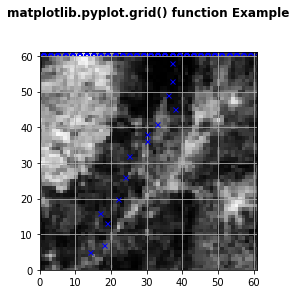

In [ ]:
plt.xlim(0, env.image.w-1)
plt.ylim(0, env.image.h-1)

x = env.image.w
y = env.image.h
im = cv2.rotate( env.image.image,cv2.cv2.ROTATE_90_COUNTERCLOCKWISE)
for item in range (len(env.navigation)):
      #for item1 in range (len(nav[item])):
      #x = nav[item][item1][0]
      #y = nav[item][item1][1]
      x = env.navigation[item][0]
      y = env.navigation[item][1]
      plt.plot(x, y,scalex=True,scaley=True, marker="x", markersize=5, markeredgecolor="blue", markerfacecolor="green")
      #plt.savefig('/content/sample_data/plot1.png')

#print(navigation)
plt.grid(True)
#plt.savefig('/content/sample_data/plot1.png')
plt.imshow(env.image.image,origin='lower')#,vmin = 0, vmax = 255)
plt.title('matplotlib.pyplot.grid() function Example\n\n', fontweight ="bold")
plt.savefig('/content/sample_data/plot2.png')
plt.show()

# 2. Create a Deep Learning Model with Keras

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

In [ ]:
states = env.observation_space.shape#np.array(env.observation_space.shape)
states1 = env.observation_space.shape[0]
actions = env.action_space.n

tensor_state = tf.constant([[states]])
tensor_action = tf.constant([[actions]])

In [ ]:
print(actions)
print(states)
print(states1)

print(tensor_state)
print(tensor_action)

8
(1, 15625)
1
tf.Tensor([[[    1 15625]]], shape=(1, 1, 2), dtype=int32)
tf.Tensor([[8]], shape=(1, 1), dtype=int32)


In [ ]:
def build_model(states, actions):

    model = Sequential()
    '''
    model.add(Dense(24, activation='relu', batch_input_shape=states))#batch_input_shape=states))
    #model.add(Flatten())
    model.add(Dense(24, activation='relu'))
    #model.add(Flatten())
    model.add(Dense(actions, activation='linear'))
    '''
    model.add(Dense(64, input_dim = states , activation = 'relu'))
    model.add(Dense(32, activation = 'relu'))
    model.add(Dense(actions, activation = 'linear'))
    model.compile(optimizer=Adam(), loss = 'mse')
    return model

In [ ]:
del model

In [ ]:
model = build_model(states1,actions)#(states, actions)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                128       
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 8)                 264       
                                                                 
Total params: 2,472
Trainable params: 2,472
Non-trainable params: 0
_________________________________________________________________


# 3. Build Agent with Keras-RL

In [ ]:
from rl.agents import DQNAgent
from rl.policy import BoltzmannQPolicy
from rl.memory import SequentialMemory

In [ ]:
def build_agent(model, actions):
    policy = BoltzmannQPolicy()
    memory = SequentialMemory(limit=10000, window_length=1)
    dqn = DQNAgent(model=model, memory=memory, policy=policy,
                  nb_actions=actions, nb_steps_warmup=10, target_model_update=1e-2)
    return dqn

In [ ]:
layers = model.layers
print(layers)
inputs = model.inputs
print(inputs)
outputs = model.outputs
print(len(outputs))
print(outputs)

[<keras.layers.core.dense.Dense object at 0x7ff455a76290>, <keras.layers.core.dense.Dense object at 0x7ff455a7f050>, <keras.layers.core.dense.Dense object at 0x7ff455a05e10>]
[<tf.Tensor 'dense_6_input:0' shape=(None, 1) dtype=float32>]
1
[<tf.Tensor 'dense_8/BiasAdd:0' shape=(None, 8) dtype=float32>]


In [ ]:
dqn = build_agent(model, actions)
dqn.compile(Adam(lr=1e-3), metrics=['mae'])
dqn.fit(env, nb_steps=10000, visualize=False, verbose=1)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Training for 10000 steps ...
Interval 1 (0 steps performed)
    1/10000 [..............................] - ETA: 10:32 - reward: -500.0000

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
/usr/local/lib/python3.7/dist-packages/rl/memory.py:37: UserWarning: Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!
  warnings.warn('Not enough entries to sample without replacement. Consider increasing your warm-up phase to avoid oversampling!')


10000/10000 [==============================] - 75s 7ms/step - reward: -496.8000
done, took 74.511 seconds


In [ ]:
scores = dqn.test(env, nb_episodes=10, visualize=False)
#print(f"{env.navigation}")
print(np.mean(scores.history['episode_reward']))


Testing for 10 episodes ...
Episode 1: reward: -62500.000, steps: 125
Episode 2: reward: -62500.000, steps: 125
Episode 3: reward: -62500.000, steps: 125
Episode 4: reward: -62500.000, steps: 125
Episode 5: reward: -62500.000, steps: 125
Episode 6: reward: -62500.000, steps: 125
Episode 7: reward: -62500.000, steps: 125
Episode 8: reward: -62500.000, steps: 125
Episode 9: reward: -62500.000, steps: 125
Episode 10: reward: -62500.000, steps: 125
-62500.0


In [ ]:
_ = dqn.test(env, nb_episodes=5, visualize=False)


Testing for 5 episodes ...
Episode 1: reward: -62500.000, steps: 125
Episode 2: reward: -62500.000, steps: 125
Episode 3: reward: -62500.000, steps: 125
Episode 4: reward: -62500.000, steps: 125
Episode 5: reward: -62500.000, steps: 125


[(14, 0), (15, 1), (16, 2), (17, 3), (18, 4), (19, 5), (20, 6), (21, 7), (22, 8), (23, 9), (24, 10), (25, 11), (26, 12), (27, 13), (28, 14), (29, 15), (30, 16), (31, 17), (32, 18), (33, 19), (34, 20), (35, 21), (36, 22), (37, 23), (38, 24), (39, 25), (40, 26), (41, 27), (42, 28), (43, 29), (44, 30), (45, 31), (46, 32), (47, 33), (48, 34), (49, 35), (50, 36), (51, 37), (52, 38), (53, 39), (54, 40), (55, 41), (56, 42), (57, 43), (58, 44), (59, 45), (60, 46), (61, 47), (62, 48), (63, 49), (64, 50), (65, 51), (66, 52), (67, 53), (68, 54), (69, 55), (70, 56), (71, 57), (72, 58), (73, 59), (74, 60), (75, 61), (76, 62), (77, 63), (78, 64), (79, 65), (80, 66), (81, 67), (82, 68), (83, 69), (84, 70), (85, 71), (86, 72), (87, 73), (88, 74), (89, 75), (90, 76), (91, 77), (92, 78), (93, 79), (94, 80), (95, 81), (96, 82), (97, 83), (98, 84), (99, 85), (100, 86), (101, 87), (102, 88), (103, 89), (104, 90), (105, 91), (106, 92), (107, 93), (108, 94), (109, 95), (110, 96), (111, 97), (112, 98), (113, 

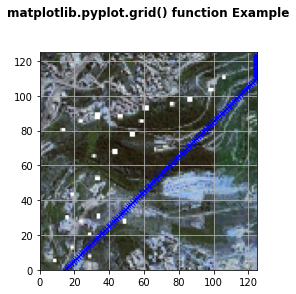

In [ ]:
plt.xlim(0, env.image.w)
plt.ylim(0, env.image.h)
print(f"{env.navigation}")
x = env.image.w
y = env.image.h

for item in range (len(env.navigation)):
      x = env.navigation[item][0]
      y = env.navigation[item][1]
      plt.plot(x, y,scalex=True,scaley=True, marker="x", markersize=5, markeredgecolor="blue", markerfacecolor="green")

#print(navigation)
plt.grid(True)
plt.imshow(env.image.image,cmap='gray', vmin = 0, vmax = 255)
plt.title('matplotlib.pyplot.grid() function Example\n\n', fontweight ="bold")
#plt.savefig('/content/sample_data/plot.png')
plt.show()

# 4. Reloading Agent from Memory

In [ ]:
dqn.save_weights('dqn_weights.h5f', overwrite=True)

In [ ]:
del model
del dqn
del env

In [ ]:
env = gym.make('CartPole-v0')
actions = env.action_space.n
states = env.observation_space.shape[0]
model = build_model(states, actions)
dqn = build_agent(model, actions)
dqn.compile(Adam(lr=1e-3), metrics=['mae'])

In [ ]:
dqn.load_weights('dqn_weights.h5f')

ValueError: ignored

In [ ]:
_ = dqn.test(env, nb_episodes=5, visualize=True)

Testing for 5 episodes ...
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Episode 1: reward: 200.000, steps: 200
Episode 2: reward: 200.000, steps: 200
Episode 3: reward: 200.000, steps: 200
Episode 4: reward: 200.000, steps: 200
Episode 5: reward: 200.000, steps: 200


# **My Deep Learning**


In [ ]:
import sys
import gym
import torch
import pylab
import random
import numpy as np
from collections import deque
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.autograd import Variable
from torchvision import transforms

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
agent.to(device)

In [ ]:

# approximate Q function using Neural Network
# state is input and Q Value of each action is output of network
class DQN(nn.Module):
    def __init__(self, state_size, action_size):
        super(DQN, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(state_size, 24),
            nn.ReLU(),
            nn.Linear(24, 24),
            nn.ReLU(),
            nn.Linear(24, action_size)
        )

    def forward(self, x):
        return self.fc(x)


# Define the transformer-based agent
class TransformerAgent(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.encoder_layer = nn.TransformerEncoderLayer(d_model=input_size, nhead=4)
        self.encoder = nn.TransformerEncoder(self.encoder_layer, num_layers=6)
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, output_size)

    def forward(self, x):
        x = self.encoder(x)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [ ]:
# DQN Agent for the Cartpole
# it uses Neural Network to approximate q function
# and replay memory & target q network
class DQNAgent():
    def __init__(self, state_size, action_size):
        # if you want to see Cartpole learning, then change to True
        self.render = False
        self.load_model = False

        # get size of state and action
        self.state_size = state_size
        self.action_size = action_size

        # These are hyper parameters for the DQN
        self.discount_factor = 0.99
        self.learning_rate = 0.4#0.001
        self.memory_size = 20000
        self.epsilon = 1.0
        self.epsilon_min = 0.01
        self.explore_step = 5000
        self.epsilon_decay = (self.epsilon - self.epsilon_min) / self.explore_step
        self.batch_size = 64
        self.train_start = 1000

        # create replay memory using deque
        self.memory = deque(maxlen=self.memory_size)

        # create main model and target model
        self.model = DQN(state_size, action_size)
        self.model.apply(self.weights_init)
        self.target_model = DQN(state_size, action_size)
        self.optimizer = optim.Adam(self.model.parameters(),
                                    lr=self.learning_rate)

        # initialize target model
        self.update_target_model()

        if self.load_model:
            self.model = torch.load('save_model/cartpole_dqn')

    # weight xavier initialize
    def weights_init(self, m):
        classname = m.__class__.__name__
        if classname.find('Linear') != -1:
            torch.nn.init.xavier_uniform(m.weight)

    # after some time interval update the target model to be same with model
    def update_target_model(self):
        self.target_model.load_state_dict(self.model.state_dict())

    #  get action from model using epsilon-greedy policy
    def get_action(self, state):
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_size)
        else:
            state = torch.from_numpy(state)
            state = Variable(state).float().cpu()
            q_value = self.model(state)
            #if q_value.shape ==1:
            q_value = torch.reshape(q_value, [1,5])
            #print(f"state:{state},q_value:{q_value},shapes:state:{state.shape},qvalue:{q_value.shape},qvalue size:{q_value.size}")
            #print(f"max:{torch.max(q_value,1)}")
            _, action = torch.max(q_value,1,)# 1)

            return int(action)

    # save sample <s,a,r,s'> to the replay memory
    def append_sample(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    # pick samples randomly from replay memory (with batch_size)
    def train_model(self):
        if self.epsilon > self.epsilon_min:
            self.epsilon -= self.epsilon_decay

        mini_batch = random.sample(self.memory, self.batch_size)
        mini_batch = np.array(mini_batch,dtype=object).transpose()

        states = np.vstack(mini_batch[0])
        actions = list(mini_batch[1])
        rewards = list(mini_batch[2])
        next_states = np.vstack(mini_batch[3])
        dones = mini_batch[4]

        # bool to binary
        dones = dones.astype(int)

        # Q function of current state
        states = torch.Tensor(states)
        states = Variable(states).float()
        pred = self.model(states)

        # one-hot encoding
        a = torch.LongTensor(actions).view(-1, 1)

        one_hot_action = torch.FloatTensor(self.batch_size, self.action_size).zero_()
        one_hot_action.scatter_(1, a, 1)

        pred = torch.sum(pred.mul(Variable(one_hot_action)), dim=1)

        # Q function of next state
        next_states = torch.Tensor(next_states)
        next_states = Variable(next_states).float()
        next_pred = self.target_model(next_states).data

        rewards = torch.FloatTensor(rewards)
        dones = torch.FloatTensor(dones)

        # Q Learning: get maximum Q value at s' from target model
        target = rewards + (1 - dones) * self.discount_factor * next_pred.max(1)[0]
        target = Variable(target)

        self.optimizer.zero_grad()

        # MSE Loss function
        loss = F.mse_loss(pred,target)
        loss.backward()

        # and train
        self.optimizer.step()

# My Deep learning with transform

In [2]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
#print(len(M_peices))
#print(M_peices)
!mkdir /content/sample_data/image
!mkdir /content/sample_data/result


In [ ]:
!rm  -r /content/sample_data/image/
!rm  -r /content/sample_data/result/


In [ ]:
torch.cuda.is_available()

In [ ]:
!zip -r /content/data.zip /content/sample_data/image /content/sample_data/result

In [ ]:
#this will not split the image as needed.don't run it
IMAGE_PATH = '/content/gdrive/MyDrive/map.png'
#IMAGE_PATH = '/content/sample_data/mapp.png'
im = Image.open(IMAGE_PATH)
WIDTH, HEIGHT = im.size

NUM_PEICES = 10
RATIO = WIDTH/HEIGHT

WIDTHCROP = int(WIDTH/NUM_PEICES)
HEIGHTCROP = int(WIDTHCROP//RATIO) # // is for dividing float
#HEIGHTCROP = int(WIDTH//NUM_PEICES) # // is for dividing float

ROWS = int(WIDTH// WIDTHCROP) #so we can get the number of rows we want
COLUMNS = int(HEIGHT // HEIGHTCROP)

print(f"{HEIGHT},{WIDTH},{ROWS},{COLUMNS},{WIDTHCROP},{HEIGHTCROP}")
M_peices = MatrixOfPeices(IMAGE_PATH,HEIGHTCROP,WIDTHCROP,NUM_PEICES,ROWS,COLUMNS)

In [ ]:
import glob
#add all peices to an array
tiles = glob.glob('/content/gdrive/MyDrive/map_*')
#tiles

In [28]:
from datetime import datetime
if __name__ == "__main__":
    state = 0
    TRAIN_EPISODES = 50
    for p in M_peices:
      print(p)
      image = cv2.imread(p)
      #image = cv2.imread(p[0])
      env = ShowerEnv(image)

      #env.image.imagePixels = env.image.LoadPeiceOfArray(env.defaultposition)
      env.observation_space =  env.image.GetAllImageState()

      state_size = env.observation_space.shape[0]
      action_size = env.action_space.n
      state = np.reshape(state, [1, state_size])
      agent = DQNAgent(state_size, action_size)
      #print(f"states available:{state}")
      for e in range(TRAIN_EPISODES):
        starttime = datetime.now();
        #print(f"episode:{e}")
        done = False
        score = 0
        state = state[0]
        env.reset()
        #env.episode_length = len(env.image.imagePixels)
        #print(f"state:{state}\nand episode is:{env.episode_length}")
        while not done:

          action = agent.get_action(state)

          next_state, reward, done, info = env.step(action)
          #print(f"training:new_state{next_state},and reward:{reward}")
          next_state = np.reshape(next_state, [1, state_size])

          # if an action make the episode end, then gives penalty of -100
          #reward = reward if not done or score == 499 else -10

          # save the sample <s, a, r, s'> to the replay memory
          agent.append_sample(state, action, reward, next_state, done)
          # every time step do the training
          if len(agent.memory) >= agent.train_start:
              agent.train_model()
          #for path in M_peices:
          #  for i in range (len(path)):
          #    image = cv2.imread(path[i])

              #print(image.size)
              #print(f"image width for {path[i]} = {image.shape}")
          score += reward
          state = next_state
          #if current_index == (5,5):
          #  b_Istravel = False
          if done:
              # every episode update the target model to be same with model
              agent.update_target_model()
              print(f"Time for one episode:{datetime.now()-starttime}")
              #print(f"navi:{env.navigation}")
      PlottingMap(env, p[p.rindex("/")+1:p.find(".png")])


/content/gdrive/MyDrive/map_01_02.png
episode length:5448975


NameError: ignored

In [ ]:
print(f"{len(env.navigation)}")
print(f"{env.navigation}")

In [ ]:
p = torch.randn([2, 3])
print(p)
print(p.shape)

tensor([[-0.5319,  0.2878,  0.0240],
        [-1.3424, -0.6575,  2.1077]])
torch.Size([2, 3])


# **Transformer RL**


In [ ]:
import gym
import torch
import torch.nn as nn
import torch.nn.functional as F
import random

# Define the environment
#env = gym.make('Taxi-v3')
#num_states = env.observation_space.n
#num_actions = env.action_space.n
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


# Define the transformer-based agent
class TransformerAgent(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.encoder_layer = nn.TransformerEncoderLayer(d_model=input_size, nhead=1)#4
        self.encoder = nn.TransformerEncoder(self.encoder_layer, num_layers=6)
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, output_size)

    def forward(self, x):
        x = self.encoder(x)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Define the Q-learning algorithm
def q_learning(num_episodes,num_states, num_actions, gamma=0.99, lr=0.001):
    agent = TransformerAgent(num_states, num_actions)
    agent.to(device)
    optimizer = torch.optim.Adam(agent.parameters(), lr=lr)
    criterion = nn.MSELoss()

    #print(agent.fc1.weight.dtype)
    #print(agent.fc2.weight.dtype)

    for episode in range(num_episodes):
        state = env.reset()
        done = False
        while not done:
            # Encode the state using the transformer agent #state_tensor
            state_tensor = torch.tensor([state], dtype=torch.float32).to(device)
            state_encoding = agent.encoder(state_tensor.unsqueeze(0)).to(torch.float32)# .unsqueeze(0) is a solution from phind - create a tensor with the appropriate shape

            # Choose an action using an epsilon-greedy policy
            epsilon = 1 / (episode + 1)
            if random.random() < epsilon:
                action = env.action_space.sample()
            else:
                q_values = agent.fc2(F.relu(agent.fc1(state_encoding)))
                action = torch.argmax(q_values).item()

            # Take the action and observe the next state and reward
            next_state, reward, done, _ = env.step(action)

            # Encode the next state using the transformer agent
            next_state_tensor = torch.tensor([next_state], dtype=torch.float32).to(device)
            next_state_encoding = agent.encoder(next_state_tensor.unsqueeze(0)).to(torch.float32)

            # Update the Q-value for the current state and action
            q_values = agent.fc2(F.relu(agent.fc1(state_encoding)))
            q_value = q_values[0][action]
            next_q_values = agent.fc2(F.relu(agent.fc1(next_state_encoding)))
            max_next_q_value = torch.max(next_q_values)
            target_q_value = reward + gamma * max_next_q_value
            loss = criterion(q_value, target_q_value.detach())
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Update the state
            state = next_state

    return agent

# Train the agent using Q-learning
#agent = q_learning(num_episodes=600)
state = 0
for p in tiles:
      print(p)
      image = cv2.imread(p)
      #image = cv2.imread(p[0])
      env = ShowerEnv(image)
      #env.image.imagePixels = env.image.LoadPeiceOfArray(env.defaultposition)
      env.observation_space =  env.image.GetAllImageState()

      state_size = env.observation_space.shape[0]
      action_size = env.action_space.n
      state = np.reshape(state, [1, state_size])
      print(state_size)
      agent = q_learning(num_episodes=4,num_states=state_size, num_actions=action_size)


      # Evaluate the agent's performance
      num_episodes = 5
      total_reward = 0
      for episode in range(num_episodes):
          state = env.reset()
          done = False
          while not done:
              # Encode the state using the transformer agent
              state_tensor = torch.tensor([state], dtype=torch.float32).to(device)
              state_encoding = agent.encoder(state_tensor.unsqueeze(0)).to(torch.float32)

              # Choose the action with the highest Q-value
              q_values = agent.fc2(F.relu(agent.fc1(state_encoding)))
              action = torch.argmax(q_values).item()

              # Take the action and observe the next state and reward
              next_state, reward, done, _ = env.step(action)
              total_reward += reward

              # Update the state
              state = next_state
      PlottingMap(env, p[p.rindex("/")+1:p.find(".png")])
      print('Average reward per episode:', total_reward / num_episodes)